# Behavioral Data: Descriptive Stats and Visualizations

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Global Parameters**

In [24]:
# Set the custom palette (colorblind-friendly colors)
groups_palette = ["#0072B2", "#009E73", "#E69F00", "#999999", "#CC79A7"]
sns.set_palette(groups_palette)

# Set the font size
plt.rcParams['font.size'] = 20  # Set the base font size
plt.rcParams['axes.titlesize'] = 20  # Font size for plot titles
plt.rcParams['axes.labelsize'] = 20  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 18  # Font size for the x-tick labels
plt.rcParams['ytick.labelsize'] = 18  # Font size for the y-tick labels
plt.rcParams['legend.fontsize'] = 18  # Font size for legends

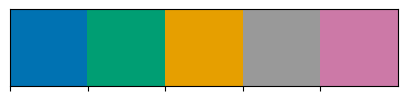

In [25]:
sns.palplot(sns.color_palette(groups_palette))

##  Import and Inspect the Data

In [26]:
cap_perf_rt = pd.read_excel("cap_perf_rt_for_stats.xlsx")
cap_perf_rt.head()

,id,stimuli_count,memory_capacity,performance,rt,group
0,1,3_stim,1.888889,75.000000,874.666667,OC
1,2,3_stim,2.485714,86.666667,749.305556,OC
2,3,3_stim,2.275862,83.333333,833.644231,OC
3,4,3_stim,1.971429,75.833333,746.810526,OC
4,5,3_stim,2.196154,77.500000,709.940594,OC


### Rename values for clarity

In [27]:
# Map stimulus count labels 
stim_count_labels = {
    '3_stim': '3 Stimuli',
    '4_stim': '4 Stimuli'
}

# Update values
cap_perf_rt['stimuli_count'] = cap_perf_rt['stimuli_count'].map(stim_count_labels)

In [28]:
cap_perf_rt.head()

,id,stimuli_count,memory_capacity,performance,rt,group
0,1,3 Stimuli,1.888889,75.000000,874.666667,OC
1,2,3 Stimuli,2.485714,86.666667,749.305556,OC
2,3,3 Stimuli,2.275862,83.333333,833.644231,OC
3,4,3 Stimuli,1.971429,75.833333,746.810526,OC
4,5,3 Stimuli,2.196154,77.500000,709.940594,OC


### Define the order of groups and conditions

In [29]:
group_order = ['M','NCF', 'NCL', 'OC', 'IUD'] 
stim_count_order = ['3 Stimuli', '4 Stimuli']

## Remove Subjects' Data

For details on why certain subjects were removed, refer to the document "INFO_removed_subjects.txt".

In [30]:
def remove_subjects(df, id_column_name, ids_to_remove):
    cleaned_df = df[~df[id_column_name].isin(ids_to_remove)] 
    return cleaned_df

In [31]:
# List of subjects to remove
subjects_to_remove_path = '/Users/linagladutyte/Documents/GitHub/VWM_paper/analysis_scripts/subjects_to_remove.txt'

with open(subjects_to_remove_path, "r") as file:
    subjects_to_remove = [int(line.strip()) for line in file]


print(subjects_to_remove)

[108, 123, 205, 316, 102, 109, 133, 236, 237, 333, 202, 213, 6, 603, 604, 614, 618, 624, 628, 627]


In [32]:
cap_perf_rt = remove_subjects(cap_perf_rt, "id", subjects_to_remove)

In [33]:
len(cap_perf_rt["id"].unique())

165

##  **Descriptive Stats**

###  By group 

In [34]:
age = pd.read_excel("/Users/linagladutyte/Documents/GitHub/VWM_paper/analysis_scripts/1_Demographic_Questionnaires/clean_demographic_questionnaires_hormones.xlsx")
age = age[['id','age']]

cap_perf_rt = cap_perf_rt.merge(age, on='id', how='inner')
cap_perf_rt.head()

,id,stimuli_count,memory_capacity,performance,rt,group,age
0,1,3 Stimuli,1.888889,75.000000,874.666667,OC,29.0
1,1,4 Stimuli,1.976190,58.333333,972.197674,OC,29.0
2,2,3 Stimuli,2.485714,86.666667,749.305556,OC,21.0
3,2,4 Stimuli,3.709770,76.666667,891.792453,OC,21.0
4,3,3 Stimuli,2.275862,83.333333,833.644231,OC,32.0


In [35]:
# aggregate data
cap_perf_rt_group = cap_perf_rt.groupby(['group','id', 'age']).agg({
    'memory_capacity': 'mean',
    'performance': 'mean',
    'rt': 'mean'
}).reset_index()

# Convert columns to ordered categorical types
cap_perf_rt_group['group'] = pd.Categorical(cap_perf_rt_group['group'], categories = group_order, ordered = True)

cap_perf_rt_group.head()

,group,id,age,memory_capacity,performance,rt
0,IUD,101,25.0,2.021346,60.416667,810.728823
1,IUD,103,32.0,2.457269,66.250000,948.466062
2,IUD,104,27.0,2.310516,71.250000,817.458783
3,IUD,105,29.0,2.257776,64.166667,1053.655465
4,IUD,106,28.0,2.244048,80.416667,751.866459


In [42]:
cap_perf_rt[cap_perf_rt['group'] == 'NCF']['id'].unique()

array([201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 238])

In [44]:
cap_perf_rt[cap_perf_rt['id'] == 230]

,id,stimuli_count,memory_capacity,performance,rt,group,age
182,230,3 Stimuli,2.312808,80.833333,874.786408,NCF,NaN
183,230,4 Stimuli,2.450909,51.666667,948.693182,NCF,NaN


In [43]:
cap_perf_rt_group[cap_perf_rt_group['group'] == 'NCF']['id'].unique()

array([201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       231, 232, 233, 234, 235, 238])

In [12]:
# descriptive stats for each group
descriptive_stats_group = cap_perf_rt_group.groupby(['group']).agg({
    'memory_capacity': ['count', 'mean', 'std'],
    'performance': ['mean', 'std'],
    'rt': ['mean', 'std']
}).reset_index()


descriptive_stats_group

group memory_capacity                     performance             \
                  count      mean       std        mean        std   
0     M              32  2.241980  0.486662   65.572917   9.833259   
1   NCF              32  2.087014  0.430866   61.197917   9.113820   
2   NCL              35  2.167425  0.545557   65.238095  12.404573   
3    OC              37  2.295736  0.445543   68.434685  10.740524   
4   IUD              28  2.061503  0.576496   64.523810  13.209647   

           rt              
         mean         std  
0  846.662013  111.070168  
1  940.702233  169.067236  
2  851.689267  153.246499  
3  875.389572  142.854389  
4  861.686876  132.330571

###  By group and set size

In [13]:
# Convert columns to ordered categorical types
desc_group_stim = cap_perf_rt.copy()
desc_group_stim['group'] = pd.Categorical(desc_group_stim['group'], categories = group_order, ordered = True)
desc_group_stim['stimuli_count'] = pd.Categorical(desc_group_stim['stimuli_count'], categories = stim_count_order, ordered = True)

descriptive_stats_group_stim = desc_group_stim.groupby(['group', 'stimuli_count']).agg({
    'memory_capacity': ['count', 'mean', 'std'],
    'performance': ['mean', 'std'],
    'rt': ['mean', 'std']
}).reset_index()


descriptive_stats_group_stim

group stimuli_count memory_capacity                     performance  \
                                count      mean       std        mean   
0     M     3 Stimuli              32  2.199375  0.337038   76.354167   
1     M     4 Stimuli              32  2.284585  0.684173   54.791667   
2   NCF     3 Stimuli              33  2.126304  0.312291   73.838384   
3   NCF     4 Stimuli              33  2.065594  0.639930   48.863636   
4   NCL     3 Stimuli              35  2.133132  0.390952   75.761905   
5   NCL     4 Stimuli              35  2.201717  0.763659   54.714286   
6    OC     3 Stimuli              37  2.208176  0.296762   77.792793   
7    OC     4 Stimuli              37  2.383295  0.652857   59.076577   
8   IUD     3 Stimuli              28  2.039328  0.476778   72.797619   
9   IUD     4 Stimuli              28  2.083677  0.761033   56.250000   

                      rt              
         std        mean         std  
0  10.227585  786.180484  100.321042  
1  11.398610  907.143541  130.183211  
2   8.124838  899.145381  155.124351  
3  12.865858  980.503786  182.573898  
4  12.085229  805.162031  144.972511  
5  14.734778  898.216502  168.613628  
6  10.543151  820.389778  143.206038  
7  13.562532  930.389366  149.421918  
8  14.651673  818.537263  124.392299  
9  14.345279  904.836489  146.663744

In [14]:
# Save to excel if needed

filename = "rt_cap_perf_descriptive_stats.xlsx"

# stats by group and by group and stimuli count to separate sheets
with pd.ExcelWriter(filename) as writer:
    descriptive_stats_group.to_excel(writer, sheet_name = "by_group")
    descriptive_stats_group_stim.to_excel(writer, sheet_name = "by_group_setSize")

##  **Visualizations**

### **Memory Capacity**

In [15]:
# Aggregate the data
cap_group = cap_perf_rt.groupby(['id', 'group', 'age']).agg({
    'memory_capacity': 'mean'  
}).reset_index()

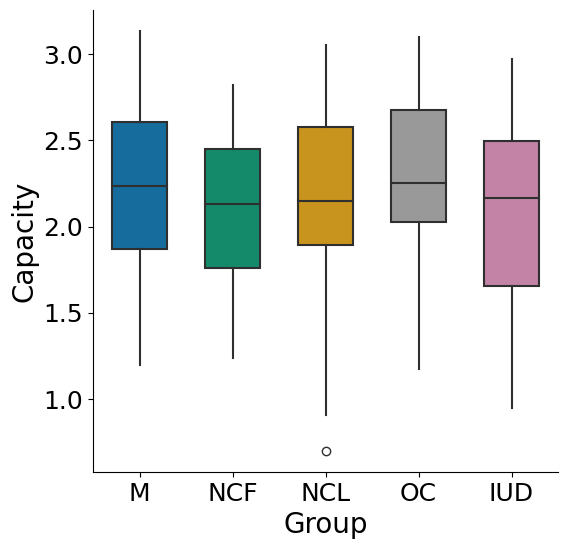

In [19]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(data=cap_group, x='group', y='memory_capacity',  order=group_order, palette=groups_palette,
                  width=0.6,
                 flierprops=dict(marker='o', markersize=6, markerfacecolor='none', linestyle='none'),
                capprops=dict(linewidth=0))

plt.ylabel('Capacity')
plt.xlabel('Group')

sns.despine(top=True, right=True)

# Save figure if needed
#plt.savefig("figures/capacity_group_boxplot.png")

plt.show()

capacity vs age

In [21]:
cap_group.rename(columns={'group': 'Group'}, inplace=True)

/Users/linagladutyte/anaconda3/envs/python_course/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

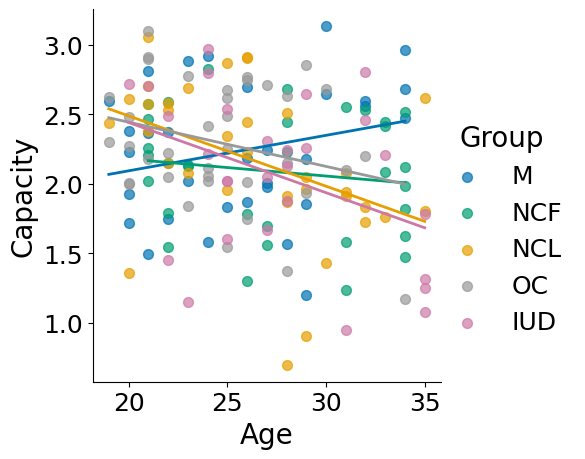

In [22]:
# Creating the scatter plot with regression lines
plt.figure(figsize=(6, 6))

sns.lmplot(data=cap_group, x='age', y='memory_capacity', hue='Group', hue_order=group_order, palette=groups_palette, ci=None, markers='o', scatter_kws={'s':50, 'alpha':0.7}, line_kws={'linewidth':2})

plt.ylabel('Capacity')
plt.xlabel('Age')

# plt.savefig("figures/capacity_age.png")

plt.show()


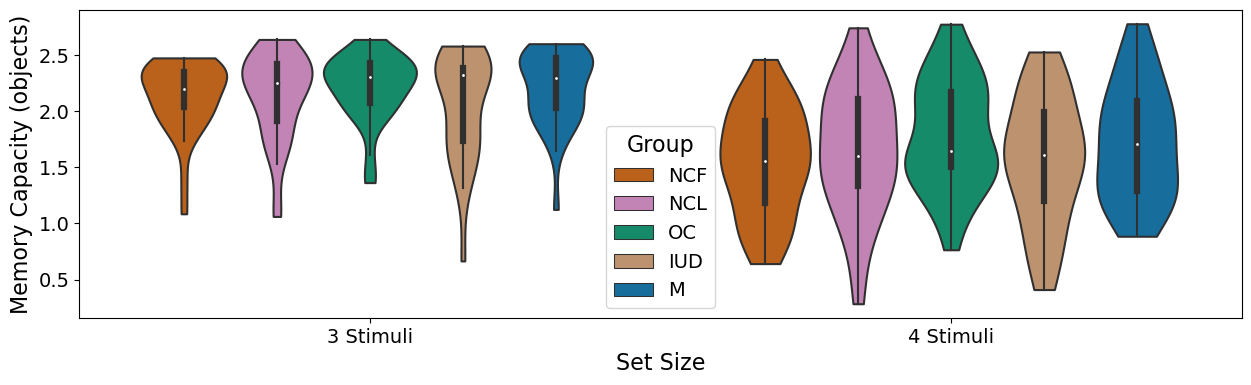

In [19]:
# Stimuli count and group
plt.figure(figsize = (15, 4))
sns.violinplot(x = 'stimuli_count', y = 'memory_capacity', hue = 'group', hue_order = group_order, order = stim_count_order, data = cap_perf_rt, cut = 0, split = False)
plt.ylabel('Memory Capacity (objects)')
plt.xlabel('Set Size')
plt.legend(title = 'Group')

# Save figure if needed
plt.savefig("capapcity_group_setsize.png")

plt.show()

### **Performance**

In [70]:
# Aggregate the data
perf_group = cap_perf_rt.groupby(['id', 'group']).agg({
    'performance': 'mean'  
}).reset_index()

# Aggregate the data
perf_stim_count = cap_perf_rt.groupby(['id', 'stimuli_count']).agg({
    'performance': 'mean'  
}).reset_index()

/var/folders/y3/4pdg9fp120s38766sq9jgvxm0000gn/T/ipykernel_5864/3835620661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=perf_group, x='group', y='performance',  order=group_order, palette=groups_palette,


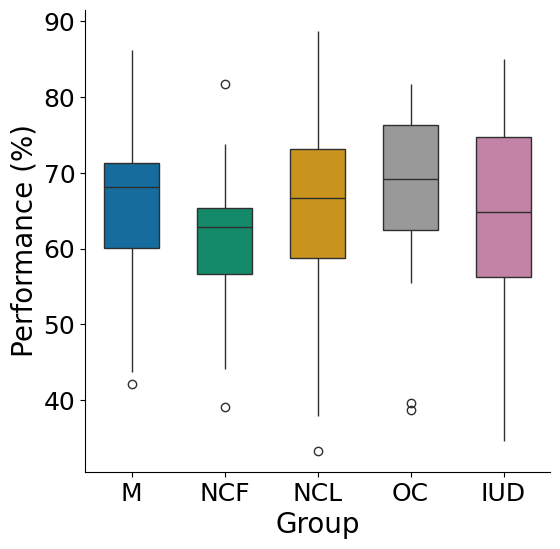

In [71]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(data=perf_group, x='group', y='performance',  order=group_order, palette=groups_palette,
                  width=0.6,
                 flierprops=dict(marker='o', markersize=6, markerfacecolor='none', linestyle='none'),
                capprops=dict(linewidth=0))

plt.ylabel('Performance (%)')
plt.xlabel('Group')

sns.despine(top=True, right=True)

# Save figure if needed
plt.savefig("figures/performance_group_bxplt.png")

plt.show()


<Figure size 800x600 with 0 Axes>

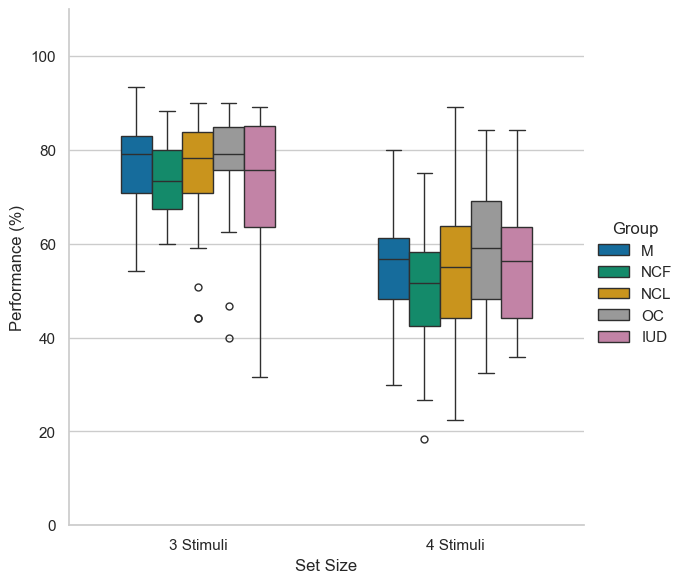

In [89]:
# Create the box plot with dodge to separate the boxes for each group
plt.figure(figsize=(8, 6))
ax = sns.catplot(data=cap_perf_rt, x='stimuli_count', y='performance', hue='group', hue_order=group_order, 
                 kind='box', width=0.6, dodge=True, 
                 flierprops=dict(markerfacecolor='none', linestyle='none'),
                 palette=groups_palette, height=6, aspect=1)

ax.set_axis_labels('Set Size', 'Performance (%)')
ax.set(ylim=(0, 110))

# Move the legend to the right
ax.legend.set_title('Group')
ax.legend.set_bbox_to_anchor((1, 0.5))

# Hide the top and right spines
sns.despine(top=True, right=True)
# Save figure if needed
plt.savefig("performance_group_setsize_bxp.png")

plt.show()



### **Response Time**

In [24]:
# Aggregate the data
rt_group = cap_perf_rt.groupby(['id', 'group']).agg({
    'rt': 'mean'  
}).reset_index()


# Aggregate the data
rt_stim_count = cap_perf_rt.groupby(['id', 'stimuli_count']).agg({
    'rt': 'mean'  
}).reset_index()

/var/folders/y3/4pdg9fp120s38766sq9jgvxm0000gn/T/ipykernel_5864/786049955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=rt_group, x = 'group', y = 'rt',  order=group_order, palette=groups_palette,


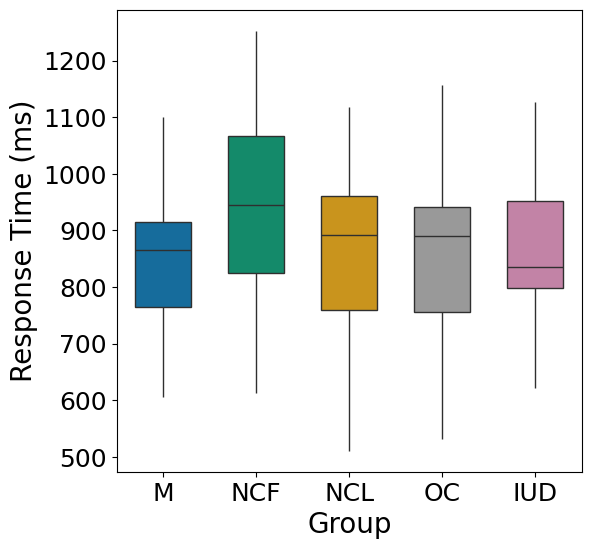

In [25]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(data=rt_group, x = 'group', y = 'rt',  order=group_order, palette=groups_palette,
                  width=0.6,
                 flierprops=dict(marker='o', markersize=6, markerfacecolor='none', linestyle='none'),
                capprops=dict(linewidth=0))

plt.ylabel('Response Time (ms)')
plt.xlabel('Group')

# Save figure if needed
plt.savefig("figures/rt_group_bxplt.png")

plt.show()


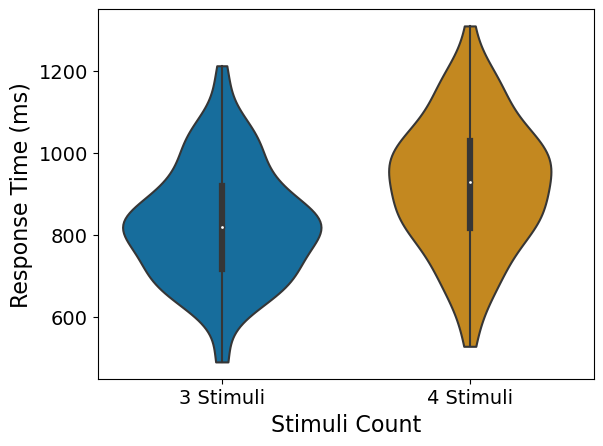

In [26]:
# Plot for stimulus counts
sns.violinplot(data = rt_stim_count, x = 'stimuli_count', y = 'rt', order = stim_count_order, palette = 'colorblind', cut = 0)
plt.ylabel('Response Time (ms)')
plt.xlabel('Stimuli Count')

# Save figure if needed
plt.savefig("rt_setsize.png")

plt.show()

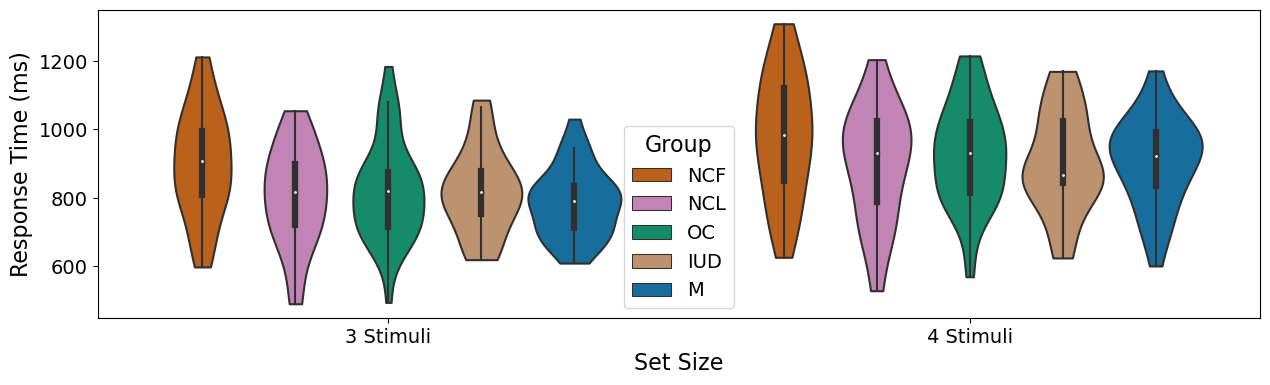

In [27]:
# Stimuli count and group
plt.figure(figsize = (15, 4))
sns.violinplot(x = 'stimuli_count', y = 'rt', data = cap_perf_rt,  hue = 'group', hue_order = group_order, order = stim_count_order, cut = 0, split = False)
plt.ylabel('Response Time (ms)')
plt.xlabel('Set Size')
plt.legend(title = 'Group')

# Save figure if needed
plt.savefig("rt_group_setsize.png")

plt.show()